In [1]:
import matplotlib.pyplot as plt

import winsound
import pandas as pd

import numpy as np

import mlrose_hiive
from time import time
from HelperFunctions import *

from mlrose_hiive import ContinuousPeaks

In [52]:
fitness = ContinuousPeaks(t_pct=.0001)
prob = mlrose_hiive.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True)

In [56]:
def run_sa(problem, params):
    start = time()
    sa_alg = sa(problem, 
                experiment_name   = "SAExperiment", 
                temperature_list  = [.1,1, 5, 10],
                decay_list        = [mlrose_hiive.ExpDecay,mlrose_hiive.GeomDecay],
                **params)

    sa_run_stats, sa_run_curves = sa_alg.run()
    sa_time = time() - start
    return sa_run_stats, sa_run_curves, sa_time

In [57]:
search_params = {
    'iteration_list'   : [1000],
    'seed'             :  0,
    'max_attempts'     :  100
}

# ========= Random Hill Climb ========= #
rhc_run_stats, rhc_curves, rh_time = run_rh(prob, search_params)
print('Random Hill Climb complete')
winsound.Beep(600, 600)

# ========= Simulated Annealing ========= #
sa_run_stats, sa_run_curves, sa_time = run_sa(prob, search_params)
print('Simulated Annealing complete')
winsound.Beep(600, 600)

# ========= Genetic Algorithm ========= #
ga_run_stats, ga_run_curves, ga_time = run_ga(prob, search_params)
print('Genetic Algorithm complete')
winsound.Beep(600, 600)

# ========= MIMIC ========= #
mmc_run_stats, mmc_run_curves, mimic_time = run_mimic(prob, search_params)
print('MIMIC complete')
winsound.Beep(600, 600)

Simulated Annealing complete


## Plot Convergence

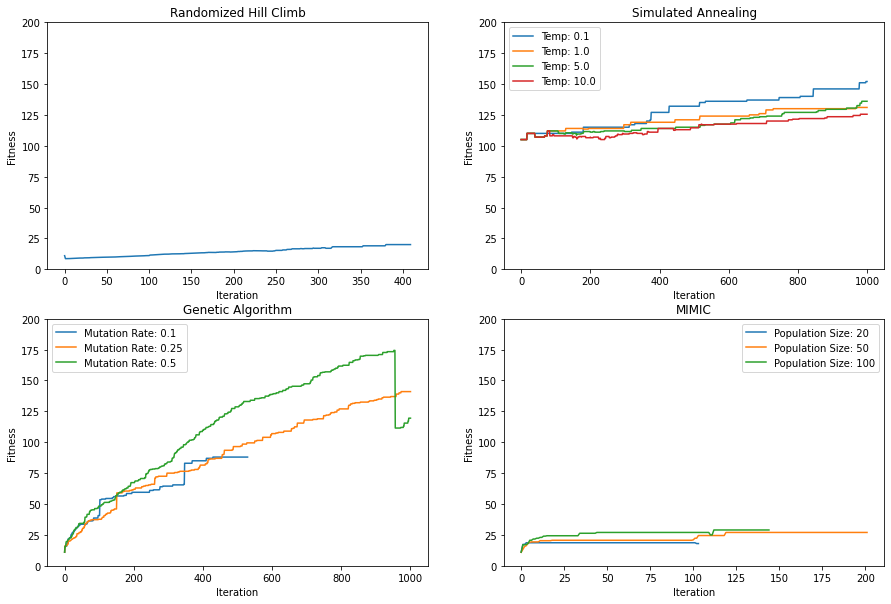

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
plot_params = {'ylabel':'Fitness', 'xlabel':'Iteration'}
rhc_curves.groupby('Iteration').mean().reset_index().Fitness.plot(ax=ax[0][0], title='Randomized Hill Climb', **plot_params, ylim=(0,200))

for temp in sa_run_curves['Temperature'].map(lambda x: x.init_temp).unique():
    cur = sa_run_curves[sa_run_curves['Temperature'].map(lambda x: x.init_temp == temp)].groupby('Iteration').mean().reset_index()
    ax[0][1].plot(cur.Fitness, label=f'Temp: {temp}')
    ax[0][1].legend()
    ax[0][1].set_title('Simulated Annealing')
    ax[0][1].set_xlabel('Iteration')
    ax[0][1].set_ylabel('Fitness')
    ax[0][1].set_ylim(0,200)
    
    
for mut in ga_run_curves['Mutation Rate'].unique():
    cur = ga_run_curves[ga_run_curves['Mutation Rate'] == mut].groupby('Iteration').mean().reset_index()
    ax[1][0].plot(cur.Fitness, label=f'Mutation Rate: {mut}')
    ax[1][0].legend()
    ax[1][0].set_title('Genetic Algorithm')
    ax[1][0].set_ylabel('Fitness')
    ax[1][0].set_xlabel('Iteration')
    ax[1][0].set_ylim(0,200)
    
for pop in mmc_run_curves['Population Size'].unique():
    cur = mmc_run_curves[mmc_run_curves['Population Size'] == pop].groupby('Iteration').mean().reset_index()
    ax[1][1].plot(cur.Fitness, label=f'Population Size: {pop}')
    ax[1][1].set_ylabel('Fitness')
    ax[1][1].set_xlabel('Iteration')
    ax[1][1].legend()
    ax[1][1].set_title('MIMIC')
    ax[1][1].set_ylim(0,200)

## Wall Clock Plot

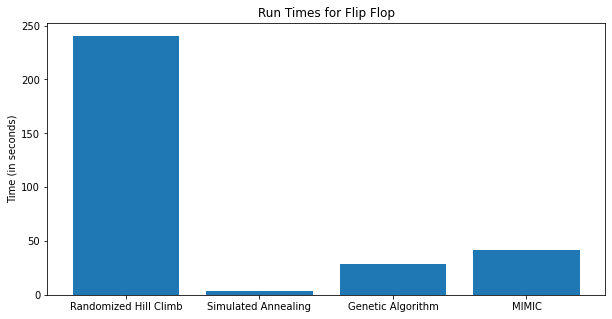

In [5]:
times = pd.DataFrame(
    {'Times':[rh_time, sa_time, ga_time, mimic_time]}, 
    index=['Randomized Hill Climb', 'Simulated Annealing', 'Genetic Algorithm', 'MIMIC'])

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(times.index, times.Times)
# times.plot(ax=ax, kind='bar')
ax.set_ylabel('Time (in seconds)')
ax.set_title('Run Times for Flip Flop');

## Changing Lengths

In [11]:
scores = {'RHC':[], 'SA':[], 'GA':[], 'MIMIC':[]}
for length in list(np.arange(40,121,20)) + [300]:
    fitness = ContinuousPeaks(t_pct=.1)
    prob = mlrose_hiive.DiscreteOpt(length = int(length), fitness_fn = fitness, maximize = True, max_val = 2)
    
    # ========= Random Hill Climb ========= #
    rhc_run_stats, rhc_curves, rh_time = run_rh(prob, search_params)
    scores['RHC'].append(rhc_curves.Fitness.max())
    print(f'RHC completed with length: {int(length)} \tscore: {rhc_curves.Fitness.max()}', end='\r')
    
    # ========= Simulated Annealing ========= #
    sa_run_stats, sa_run_curves, sa_time = run_sa(prob, search_params)
    scores['SA'].append(sa_run_curves.Fitness.max())
    print(f'SA completed with length: {int(length)} \tscore: {sa_run_curves.Fitness.max()}', end='\r')
    
    # ========= Genetic Algorithm ========= #
    ga_run_stats, ga_run_curves, ga_time = run_ga(prob, search_params)
    scores['GA'].append(ga_run_curves.Fitness.max())
    print(f'GA completed with length: {int(length)} \tscore: {ga_run_curves.Fitness.max()}', end='\r')
    
    # ========= MIMIC ========= #
    mmc_run_stats, mmc_run_curves, mimic_time = run_mimic(prob, search_params)
    scores['MIMIC'].append(mmc_run_curves.Fitness.max())
    print(f'MIMIC completed with length: {int(length)} \tscore: {mmc_run_curves.Fitness.max()}', end='\r')
    
scores = pd.DataFrame(scores, index=list(np.arange(40,121,20)) + [300])

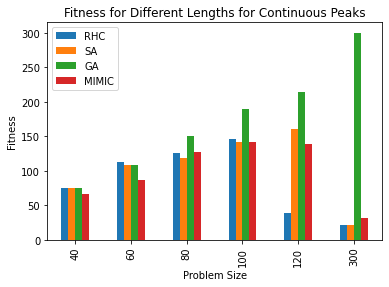

In [60]:
scores.plot.bar(xlabel='Problem Size', title='Fitness for Different Lengths for Continuous Peaks', ylabel='Fitness');